In [49]:
import pandas as pd
import numpy as np
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time
import matplotlib.pyplot as plt
from astropy.coordinates import get_moon
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x24a9ce4da30>

In [50]:
data = pd.read_csv("landolt_north.csv", delimiter = "|")
data

,oid,Identifier,ra,dec
0,2649925,BD+00 3384,234.580816,0.134701
1,7790,BD+44 156,11.392069,45.613391
2,7791,BD+44 157,11.426887,45.587618
3,595354,BD+44 1898,145.743663,43.834707
4,595358,BD+44 1904,146.840482,44.237212
...,...,...,...,...
345,9221724,UCAC4 789-005539,27.649725,67.732709
346,9221725,UCAC4 789-005569,27.880952,67.710833
347,538176,V* ER UMa,146.799754,51.902486
348,2923595,V* V648 Lyr,275.939495,41.096635


In [51]:
latitude = 51.378711*u.deg
longitude = -2.321890*u.deg
elevation = 190.0*u.m

In [52]:
bath = EarthLocation(lat = latitude, lon = longitude, height = elevation)
time = Time('2023-3-2 22:00:00')

In [53]:
##RZ CEP
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord('22h40m0.51s', '+64d58m45.0s') #ra and dec for RV Cep
c

<SkyCoord (ICRS): (ra, dec) in deg
    (340.002125, 64.97916667)>

In [54]:
caltaz = c.transform_to(AltAz(obstime=time,location=bath))
print(f"RZ Cep's Altitude = {caltaz.alt:.2}")
print(f"RZ Cep's Azimuthal = {caltaz.az:.2}")

RZ Cep's Altitude = 2.9e+01 deg
RZ Cep's Azimuthal = 3.5e+02 deg


In [55]:
##RV UMa Altitude and Azimuthal 
d = SkyCoord('13h34m12.58s', '+53d52m7.9s', frame='icrs') #ra and dec for RV UMa
d

<SkyCoord (ICRS): (ra, dec) in deg
    (203.55241667, 53.86886111)>

In [56]:
daltaz = d.transform_to(AltAz(obstime=time,location=bath))
print(f"RV UMa's Altitude = {daltaz.alt:.2}")
print(f"RV UMa's Azimuthal = {daltaz.az:.2}")

RV UMa's Altitude = 4.6e+01 deg
RV UMa's Azimuthal = 5.6e+01 deg


In [57]:
data.columns

Index(['  oid   ', '      Identifier       ', '        ra        ',
       '        dec         '],
      dtype='object')

In [58]:
data.columns = data.columns.str.strip()

In [59]:
data.columns

Index(['oid', 'Identifier', 'ra', 'dec'], dtype='object')

In [60]:
AltAzdegrees = (data['ra'], data['dec'])

In [61]:
AltAzdegrees = SkyCoord(data['ra'], data['dec'], frame='icrs', unit='deg')

In [62]:
b = AltAzdegrees.transform_to(AltAz(obstime=time,location=bath))

In [63]:
b

<SkyCoord (AltAz: obstime=2023-03-02 22:00:00.000, location=(3986043.63163787, -161621.4085625, 4960099.38666395) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(7.67188078e+01, -10.32809299), (3.17804655e+02,  21.45758243),
     (3.17767095e+02,  21.45159588), (1.15273092e+02,  75.69876901),
     (1.12081984e+02,  75.31624477), (7.25676836e+01,  46.17755186),
     (7.24835167e+01,  46.13602567), (7.25921235e+01,  46.08380269),
     (7.26953350e+01,  45.79921564), (3.45612494e+02,   8.64637352),
     (3.18184768e+02,  21.57600649), (3.17986260e+02,  22.04085671),
     (1.11985895e+02,  75.51834489), (7.21401060e+01,  46.72495381),
     (7.19518583e+01,  46.74326066), (7.21895005e+01,  46.5727331 ),
     (7.24158572e+01,  46.46531884), (4.71465175e+01,  23.52552013),
     (4.67095644e+01,  23.73933506), (4.67498462e+01,  23.36380527),
     (4.60759151e+01,  23.23228142), (1.81866685e+01,   9.38055632),
     (1.80714324e+01,   

In [64]:
f = b.to_string('decimal')
f

['76.7188 -10.3281',
 '317.805 21.4576',
 '317.767 21.4516',
 '115.273 75.6988',
 '112.082 75.3162',
 '72.5677 46.1776',
 '72.4835 46.136',
 '72.5921 46.0838',
 '72.6953 45.7992',
 '345.612 8.64637',
 '318.185 21.576',
 '317.986 22.0409',
 '111.986 75.5183',
 '72.1401 46.725',
 '71.9519 46.7433',
 '72.1895 46.5727',
 '72.4159 46.4653',
 '47.1465 23.5255',
 '46.7096 23.7393',
 '46.7498 23.3638',
 '46.0759 23.2323',
 '18.1867 9.38056',
 '18.0714 9.32596',
 '18.0145 9.25842',
 '32.6753 24.6361',
 '95.6425 56.2968',
 '51.7449 59.6945',
 '310.533 19.005',
 '308.853 17.7498',
 '109.155 71.7705',
 '308.989 24.0238',
 '93.8296 31.5309',
 '317.068 7.15468',
 '321.398 0.26924',
 '322.496 31.5896',
 '318.044 30.1983',
 '313.768 27.3078',
 '315.64 30.3755',
 '317.263 32.118',
 '309.218 30.0392',
 '314.719 36.5925',
 '313.789 41.6704',
 '63.6941 79.2869',
 '81.1566 76.8874',
 '62.0642 43.0945',
 '64.7343 27.9825',
 '44.8954 7.17342',
 '31.2922 10.5383',
 '23.7288 6.56892',
 '291.11 33.3343',
 '0.32

In [65]:
data['AltAz'] = f

In [66]:
data[['Az','Alt']] = data.AltAz.str.split(expand=True)
data

,oid,Identifier,ra,dec,AltAz,Az,Alt
0,2649925,BD+00 3384,234.580816,0.134701,76.7188 -10.3281,76.7188,-10.3281
1,7790,BD+44 156,11.392069,45.613391,317.805 21.4576,317.805,21.4576
2,7791,BD+44 157,11.426887,45.587618,317.767 21.4516,317.767,21.4516
3,595354,BD+44 1898,145.743663,43.834707,115.273 75.6988,115.273,75.6988
4,595358,BD+44 1904,146.840482,44.237212,112.082 75.3162,112.082,75.3162
...,...,...,...,...,...,...,...
345,9221724,UCAC4 789-005539,27.649725,67.732709,329.465 43.0495,329.465,43.0495
346,9221725,UCAC4 789-005569,27.880952,67.710833,329.375 43.1113,329.375,43.1113
347,538176,V* ER UMa,146.799754,51.902486,80.4999 78.1691,80.4999,78.1691
348,2923595,V* V648 Lyr,275.939495,41.096635,23.6937 6.58788,23.6937,6.58788


In [67]:
CRTS = data.loc[data['Identifier'] == "CRTS J165001.1+532913"]
CRTS

,oid,Identifier,ra,dec,AltAz,Az,Alt
24,9221829,CRTS J165001.1+532913,252.504806,53.487406,32.6753 24.6361,32.6753,24.6361


In [68]:
c_icrs = SkyCoord(ra=252.504806*u.degree, dec=53.487406*u.degree, frame='icrs')
c_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (252.504806, 53.487406)>

In [69]:
CRTS_altaz = c_icrs.transform_to(AltAz(obstime=time,location=bath))
print(f"RV UMa's Altitude = {CRTS_altaz.alt}")
print(f"RV UMa's Azimuthal = {CRTS_altaz.az}")

RV UMa's Altitude = 24.63606185255448 deg
RV UMa's Azimuthal = 32.675307823898756 deg


In [70]:
PG_icrs = SkyCoord(ra=206.255895*u.degree, dec=57.50355717*u.degree, frame='icrs')
PG_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (206.255895, 57.50355717)>

In [71]:
PG_altaz = PG_icrs.transform_to(AltAz(obstime=time,location=bath))
print(f"RV UMa's Altitude = {PG_altaz.alt}")
print(f"RV UMa's Azimuthal = {PG_altaz.az}")

RV UMa's Altitude = 46.547712131239386 deg
RV UMa's Azimuthal = 50.14063691977959 deg


In [85]:
midnight = Time('2023-3-2 00:00:00') 
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Mar2night = AltAz(obstime=midnight+delta_midnight, location=bath)
caltaz_Mar2night = caltaz.transform_to(frame_Mar2night)
c_airmass_Mar2night = caltaz_Mar2night.secz

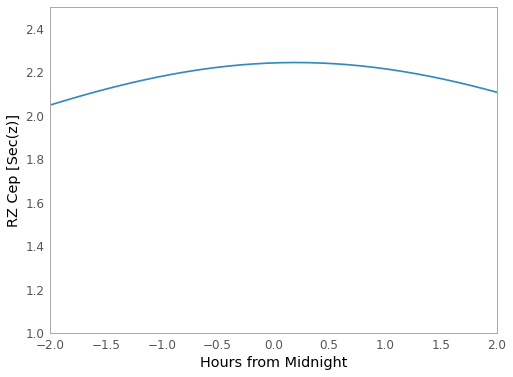

In [129]:
plt.plot(delta_midnight, c_airmass_Mar2night) #co ordinates of cepheid plotted against time RZ CEP
plt.xlim(-2, 2)
plt.ylim(1, 2.5)
plt.xlabel('Hours from Midnight')
plt.ylabel('RZ Cep [Sec(z)]')
plt.show()

In [87]:
midnight = Time('2023-3-2 00:00:00') 
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Mar2night = AltAz(obstime=midnight+delta_midnight, location=bath)
daltaz_Mar2night = daltaz.transform_to(frame_Mar2night)
d_airmass_Mar2night = daltaz_Mar2night.secz

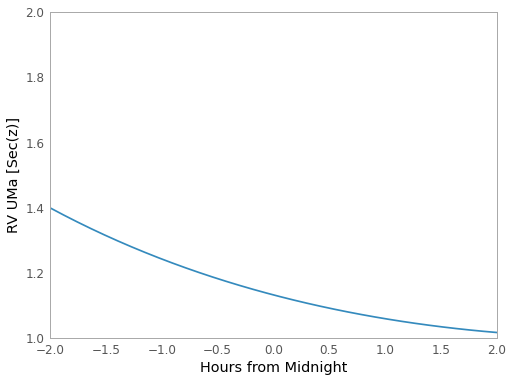

In [127]:
plt.plot(delta_midnight, d_airmass_Mar2night) #co ordinates of cepheid plotted against time RV UMa
plt.xlim(-2, 2)
plt.ylim(1, 2)
plt.xlabel('Hours from Midnight')
plt.ylabel('RV UMa [Sec(z)]')
plt.show()

In [89]:
midnight = Time('2023-3-2 00:00:00')
delta_midnight = np.linspace(-12, 12, 100)*u.hour
times_Mar2_to_3 = midnight + delta_midnight
moon_Mar2_to_3 = get_moon(times_Mar2_to_3)
frame_moon_Mar2_to_3 = AltAz(obstime=midnight+delta_midnight, location=bath)
moonaltazs_Mar2_to_3 = moon_Mar2_to_3.transform_to(frame_moon_Mar2_to_3)
daltazs_Mar2_to_3 = daltaz.transform_to(frame_moon_Mar2_to_3)
caltazs_Mar2_to_3 = caltaz.transform_to(frame_moon_Mar2_to_3)
CRTS_altaz_Mar2_to_3 = CRTS_altaz.transform_to(frame_moon_Mar2_to_3)
PG_altaz_Mar2_to_3 = PG_altaz.transform_to(frame_moon_Mar2_to_3)

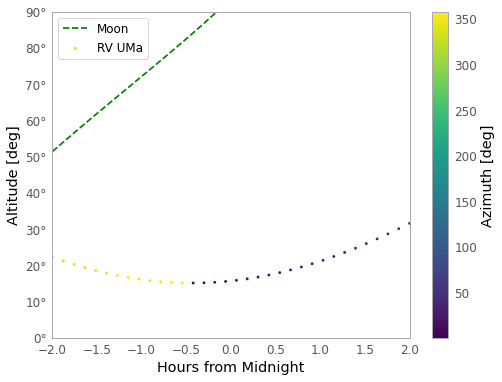

In [119]:
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='g', ls='--', label='Moon')
plt.scatter(delta_midnight, daltazs_Mar2_to_3.alt, c=daltazs_Mar2_to_3.az, label='RV UMa', lw=0, s=8,
cmap='viridis')
plt.legend(loc='upper left')
plt.colorbar().set_label('Azimuth [deg]')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

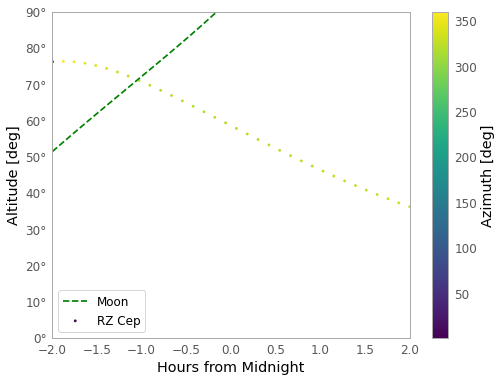

In [118]:
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='g', ls='--', label='Moon')
plt.scatter(delta_midnight, caltazs_Mar2_to_3.alt, c=caltazs_Mar2_to_3.az, label='RZ Cep', lw=0, s=8,
cmap='viridis')
plt.legend(loc='lower left')
plt.colorbar().set_label('Azimuth [deg]')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

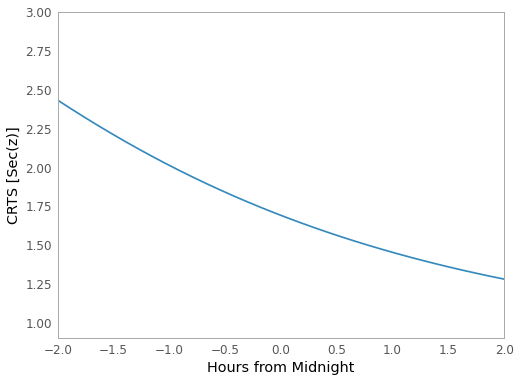

In [126]:
midnight = Time('2023-3-2 00:00:00') 
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Mar2night = AltAz(obstime=midnight+delta_midnight, location=bath)
CRTS_altaz_Mar2night = CRTS_altaz.transform_to(frame_Mar2night)
CRTS_altaz_airmass_Mar2night = CRTS_altaz_Mar2night.secz
plt.plot(delta_midnight, CRTS_altaz_airmass_Mar2night) #co ordinates of cepheid plotted against time RZ CEP
plt.xlim(-2, 2)
plt.ylim(0.9, 3)
plt.xlabel('Hours from Midnight')
plt.ylabel('CRTS [Sec(z)]')
plt.show()

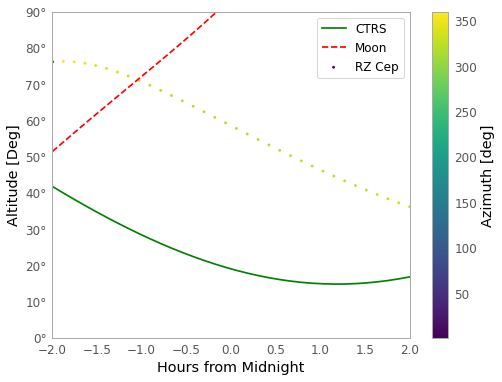

In [108]:
plt.plot(delta_midnight, CRTS_altaz_Mar2_to_3.alt, label='CTRS', color = 'g')
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='r', ls='--', label='Moon')
plt.scatter(delta_midnight, caltazs_Mar2_to_3.alt, c=caltazs_Mar2_to_3.az, label='RZ Cep', lw=0, s=8,
cmap='viridis')
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper right')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [Deg]')
plt.show()

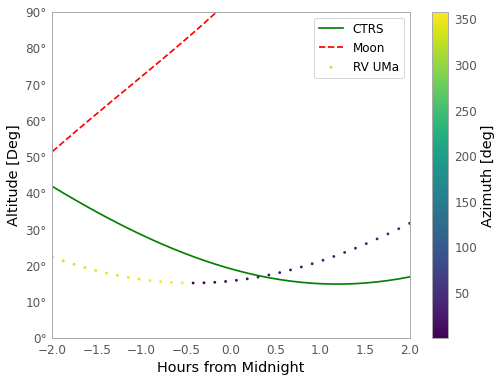

In [109]:
plt.plot(delta_midnight, CRTS_altaz_Mar2_to_3.alt, label='CTRS', color = 'g')
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='r', ls='--', label='Moon')
plt.scatter(delta_midnight, daltazs_Mar2_to_3.alt, c=daltazs_Mar2_to_3.az, label='RV UMa', lw=0, s=8,
cmap='viridis')
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper right')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [Deg]')
plt.show()

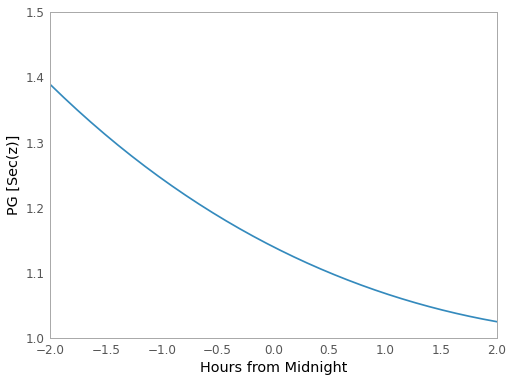

In [125]:
midnight = Time('2023-3-2 00:00:00') 
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Mar2night = AltAz(obstime=midnight+delta_midnight, location=bath)
PG_altaz_Mar2night = PG_altaz.transform_to(frame_Mar2night)
PG_altaz_airmass_Mar2night = PG_altaz_Mar2night.secz
plt.plot(delta_midnight, PG_altaz_airmass_Mar2night) #co ordinates of cepheid plotted against time RZ CEP
plt.xlim(-2, 2)
plt.ylim(1, 1.5)
plt.xlabel('Hours from Midnight')
plt.ylabel('PG [Sec(z)]')
plt.show()

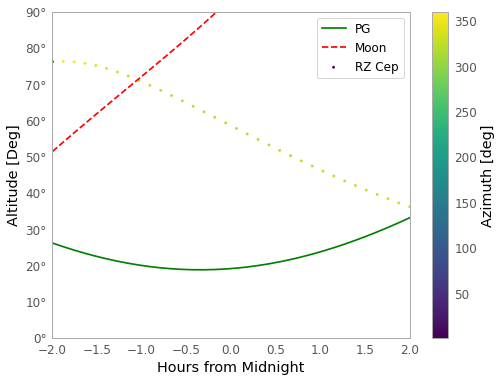

In [106]:
plt.plot(delta_midnight, PG_altaz_Mar2_to_3.alt, label='PG', color = 'g')
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='r', ls='--', label='Moon')
plt.scatter(delta_midnight, caltazs_Mar2_to_3.alt, c=caltazs_Mar2_to_3.az, label='RZ Cep', lw=0, s=8,
cmap='viridis')
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper right')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [Deg]')
plt.show()

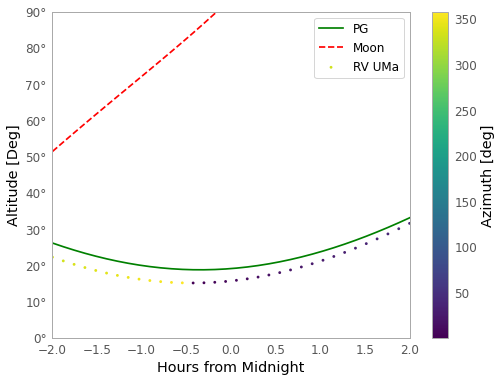

In [105]:
plt.plot(delta_midnight, PG_altaz_Mar2_to_3.alt, label='PG', color = 'g')
plt.plot(delta_midnight, moonaltazs_Mar2_to_3.az, color='r', ls='--', label='Moon')
plt.scatter(delta_midnight, daltazs_Mar2_to_3.alt, c=daltazs_Mar2_to_3.az, label='RV UMa', lw=0, s=8,
cmap='viridis')
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper right')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [Deg]')
plt.show()